<a href="https://colab.research.google.com/github/nazalnihad/style_transfer/blob/main/Style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.utils import save_image

In [14]:
model = models.vgg19(pretrained=True).features
print(model)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [ ]:
['0','5','10','19','28'] #needed

In [15]:
class VGG(nn.Module):
  def __init__(self):
    super(VGG, self).__init__()
    self.chosen_features = ['0','5','10','19','28']
    self.model = models.vgg19(pretrained=True).features[:29]

  def forward(self,x):
    features = []

    for layer_num,layer in enumerate(self.model):
      x = layer(x)

      if str(layer_num) in self.chosen_features:
        features.append(x)

    return features

In [16]:
def load_image(image):
  image = Image.open(image)
  image = Loader(image).unsqueeze(0)
  return image.to(device)

device = torch.device("cuda" if torch.cuda.is_available else "cpu")
image_size = 356

Loader = transforms.Compose([
    transforms.Resize((image_size,image_size)),
    transforms.ToTensor()
])


In [17]:
print(device)

cuda


In [18]:
original_img = load_image('/content/kitten4.jpg')
style_img = load_image('/content/style.jpg')

model = VGG().to(device).eval()
generated = original_img.clone().requires_grad_(True)

In [19]:
total_steps = 6000
learning_rate = 0.001
alpha = 1
beta = 0.01
optimizer = optim.Adam([generated], lr=learning_rate)

for step in range(total_steps):
    generated_features = model(generated)
    original_img_features = model(original_img)
    style_features = model(style_img)

    style_loss = original_loss = 0

    for gen_feature, orig_feature, style_feature in zip(generated_features, original_img_features, style_features):
        batch_size, channel, height, width = gen_feature.shape
        original_loss += torch.mean((gen_feature - orig_feature)**2)

        # gram matrix
        G = gen_feature.view(channel, height * width).mm(
            gen_feature.view(channel, height * width).t()
        )

        A = style_feature.view(channel, height * width).mm(
            style_feature.view(channel, height * width).t()
        )

        style_loss += torch.mean((G - A)**2)

    total_loss = alpha * original_loss + beta * style_loss
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    if step % 200 == 0:
        print(f"Step [{step}/{total_steps}], Total Loss: {total_loss.item()}")
        save_image(generated, f"generated_{step}.png")

# Save the final generated image
save_image(generated, "generated.png")
print("Image generation complete, final image saved as 'generated.png'")

Step [0/6000], Total Loss: 470485.5
Step [200/6000], Total Loss: 101013.8359375
Step [400/6000], Total Loss: 44383.2109375
Step [600/6000], Total Loss: 7988.14404296875
Step [800/6000], Total Loss: 2592.5654296875
Step [1000/6000], Total Loss: 1763.9593505859375
Step [1200/6000], Total Loss: 1371.653076171875
Step [1400/6000], Total Loss: 1111.8990478515625
Step [1600/6000], Total Loss: 923.3992309570312
Step [1800/6000], Total Loss: 780.6644897460938
Step [2000/6000], Total Loss: 669.8980712890625
Step [2200/6000], Total Loss: 583.360107421875
Step [2400/6000], Total Loss: 515.6554565429688
Step [2600/6000], Total Loss: 461.9862365722656
Step [2800/6000], Total Loss: 418.7099304199219
Step [3000/6000], Total Loss: 383.020263671875
Step [3200/6000], Total Loss: 353.1082458496094
Step [3400/6000], Total Loss: 327.55230712890625
Step [3600/6000], Total Loss: 305.69342041015625
Step [3800/6000], Total Loss: 286.4093017578125
Step [4000/6000], Total Loss: 269.1754150390625
Step [4200/6000]

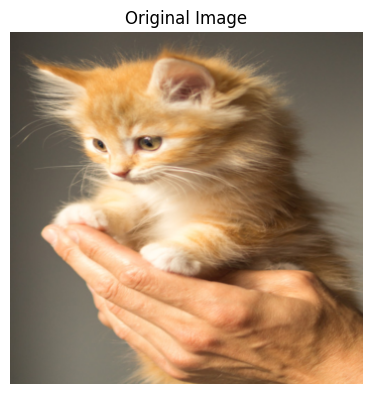

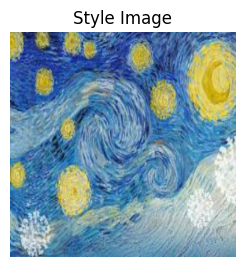

In [22]:
import matplotlib.pyplot as plt

def imshow(img, title=None):
    img = img.cpu().clone().squeeze(0)
    img = transforms.ToPILImage()(img)
    plt.imshow(img)
    plt.axis('off')
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def display_main_and_style_images(original_img, style_img):
    plt.figure(figsize=(10, 5))

    # original image
    plt.subplot(1, 2, 1)
    imshow(original_img, title='Original Image')

    # style image
    plt.subplot(1, 2, 2)
    imshow(style_img, title='Style Image')

    plt.show()

display_main_and_style_images(original_img, style_img)

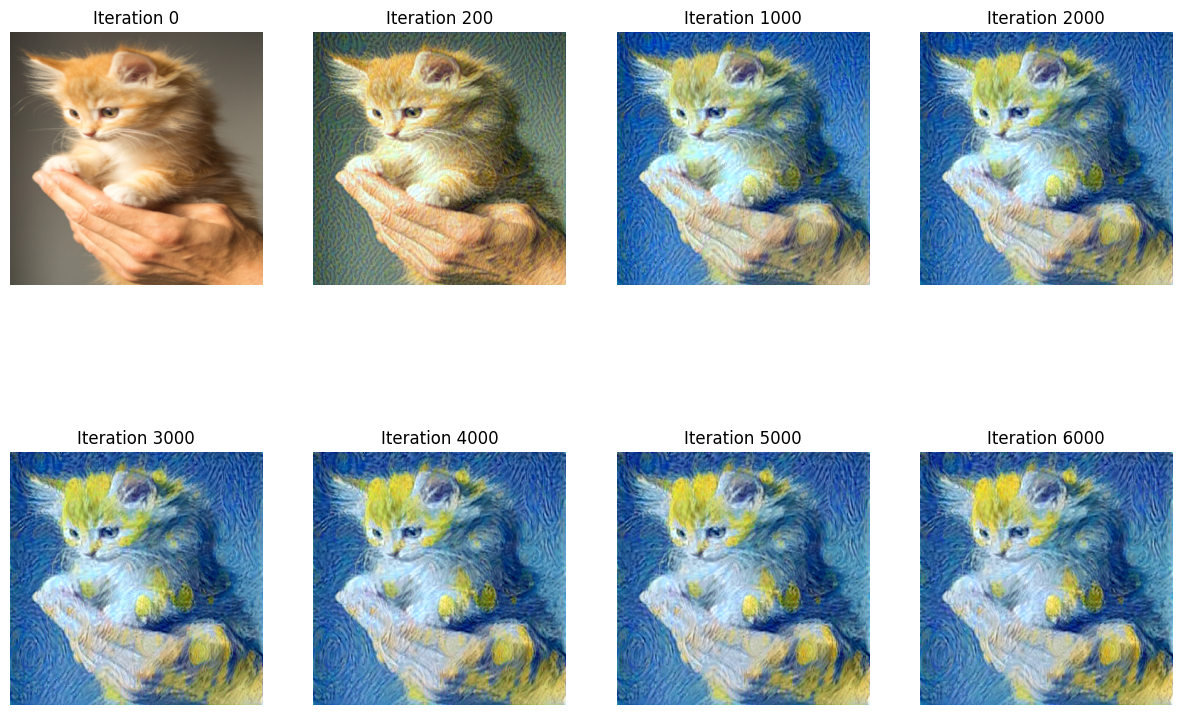

In [24]:
import matplotlib.pyplot as plt
from PIL import Image

def imshow(image, title=None):
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')

image_paths = [
    '/content/generated_0.png',
    '/content/generated_200.png',
    '/content/generated_1000.png',
    '/content/generated_2000.png',
    '/content/generated_3000.png',
    '/content/generated_4000.png',
    '/content/generated_5000.png',
    '/content/generated.png',
]

image_titles = [
    'Iteration 0',
    'Iteration 200',
    'Iteration 1000',
    'Iteration 2000',
    'Iteration 3000',
    'Iteration 4000',
    'Iteration 5000',
    'Iteration 6000',
]

def load_image(image_path):
    return Image.open(image_path)

def display_images(image_paths, image_titles):
    plt.figure(figsize=(15, 10))

    for i, (image_path, title) in enumerate(zip(image_paths, image_titles)):
        image = load_image(image_path)
        plt.subplot(2, 4, i + 1)
        imshow(image, title=title)

    plt.show()

display_images(image_paths, image_titles)
